In [27]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as pt
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [28]:
# Import dataset and drop unnecessary column
df=pd.read_csv("Data.csv")
df = df.drop('applicant_id', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                             

In [ ]:
df.shape


(25000, 23)

In [ ]:
df.describe()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


In [ ]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

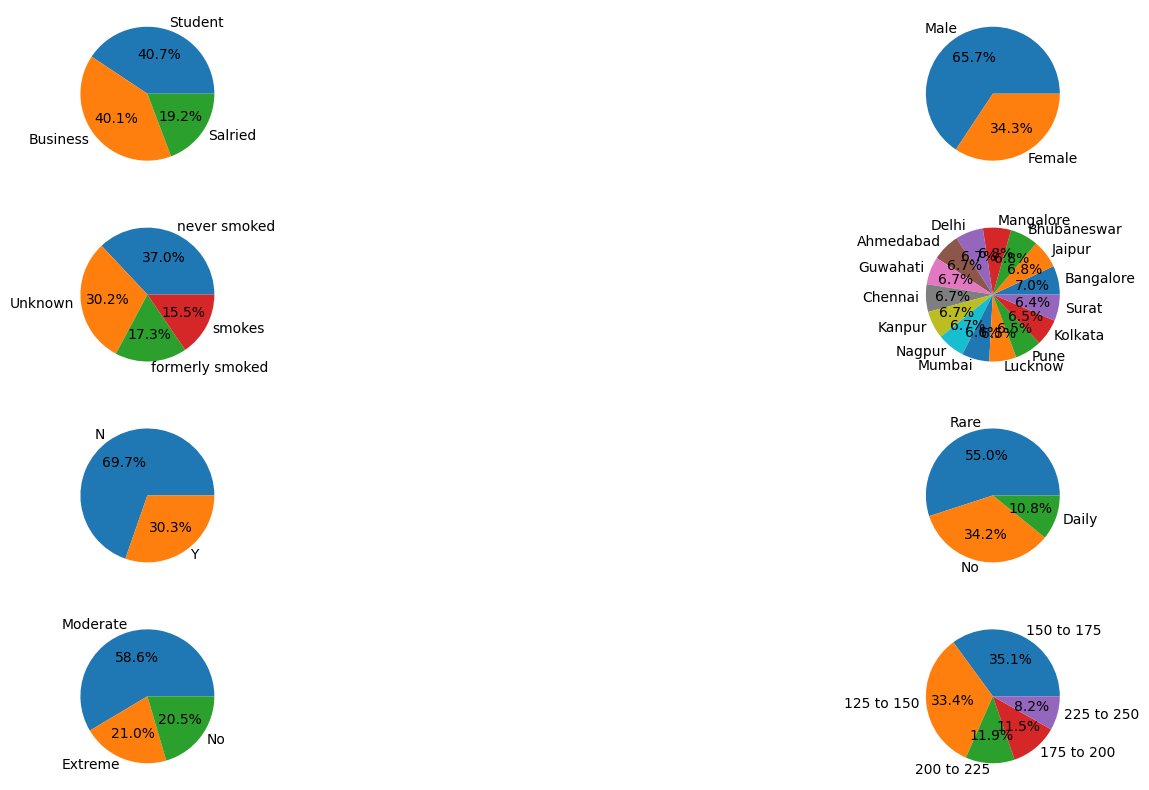

In [ ]:
# Plotting the features by pie chart
features = ['Occupation', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'cholesterol_level']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(4, 2, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

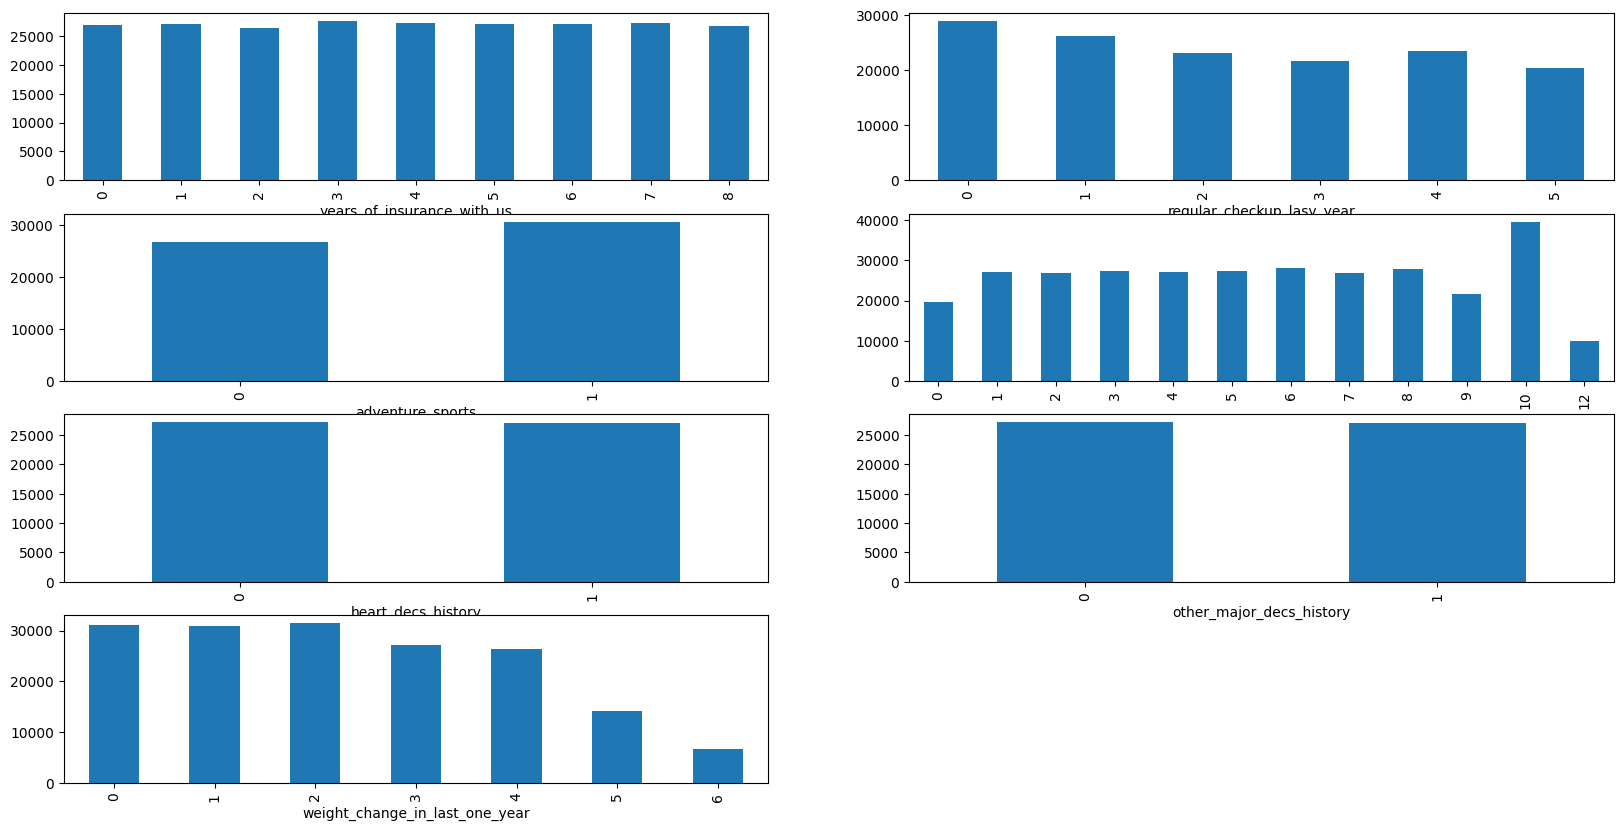

In [ ]:
# Plotting the features by bar graph
features = ['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'heart_decs_history', 'other_major_decs_history', 'weight_change_in_last_one_year']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(4, 2, i + 1)
	df.groupby(col).mean()['insurance_cost'].plot.bar()
plt.show()

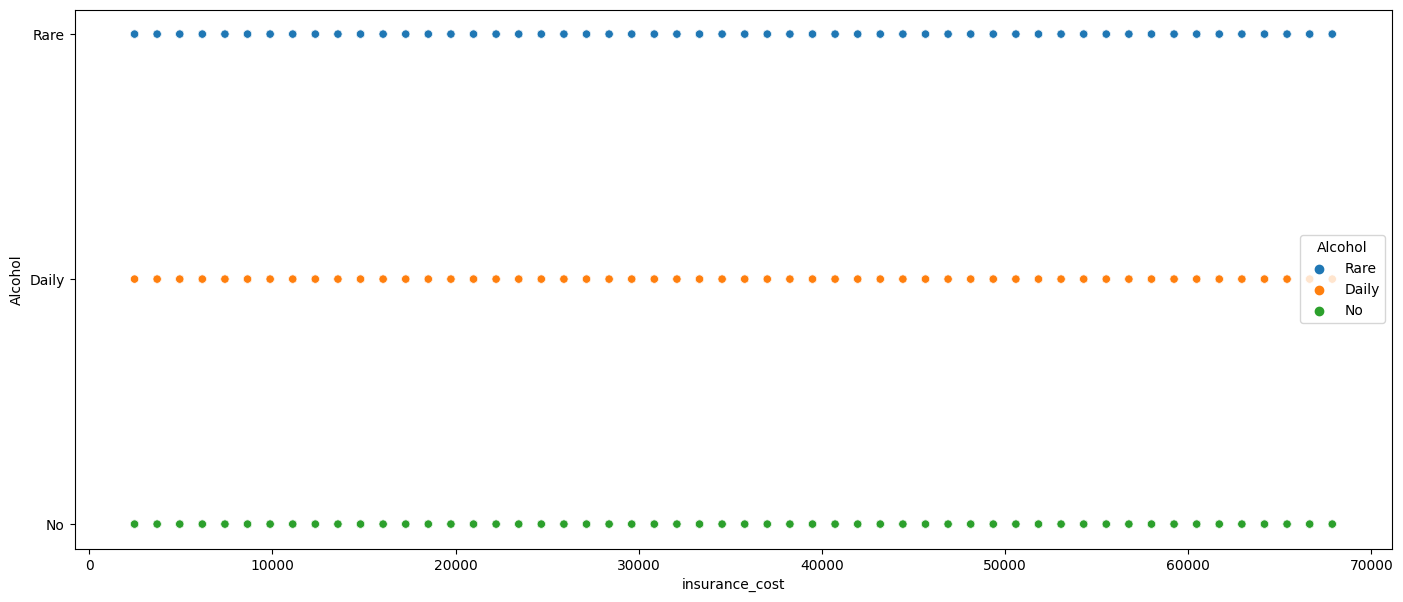

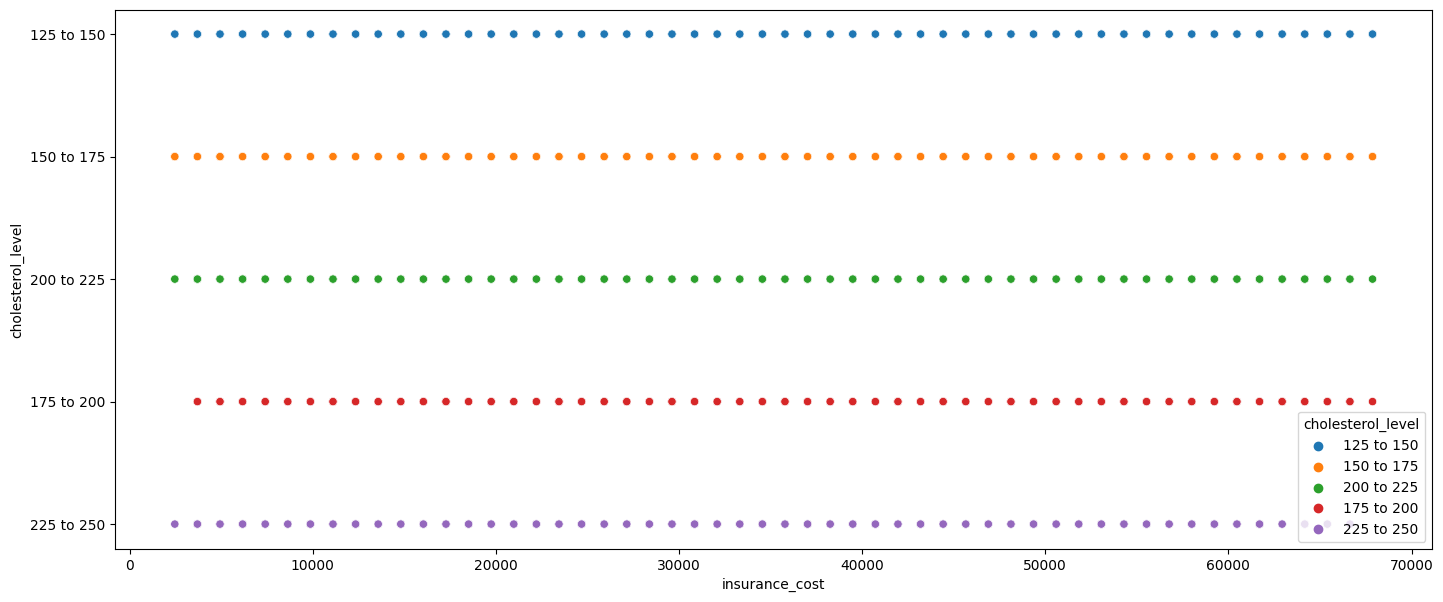

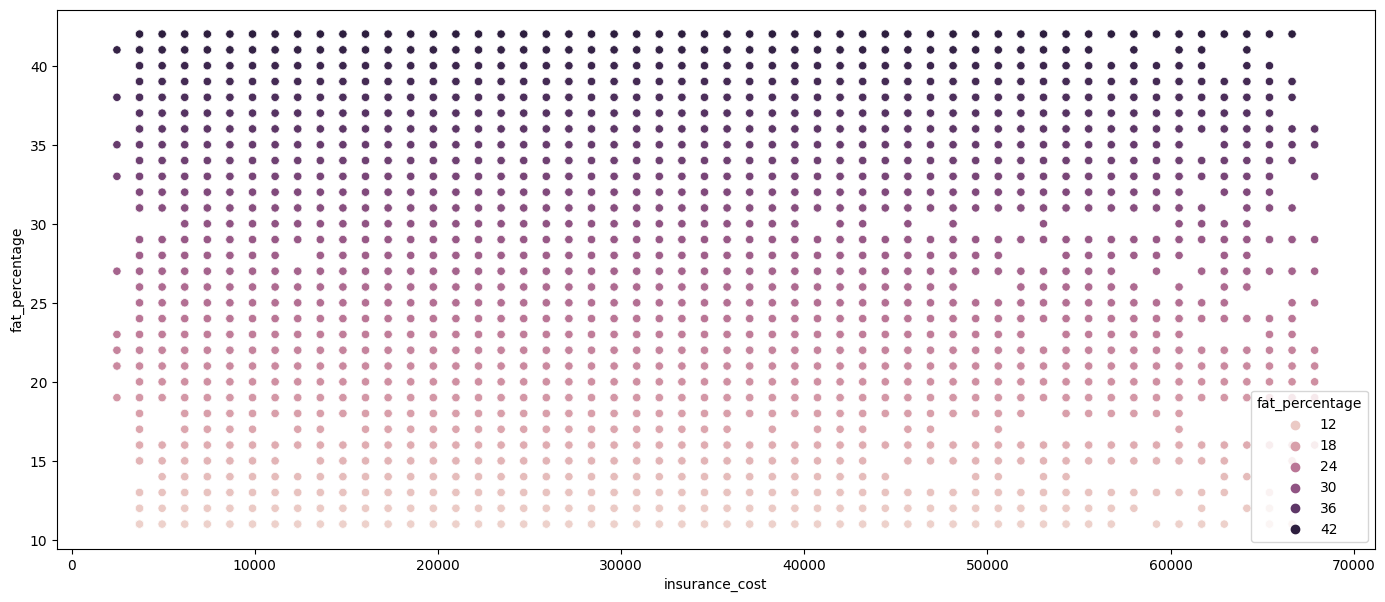

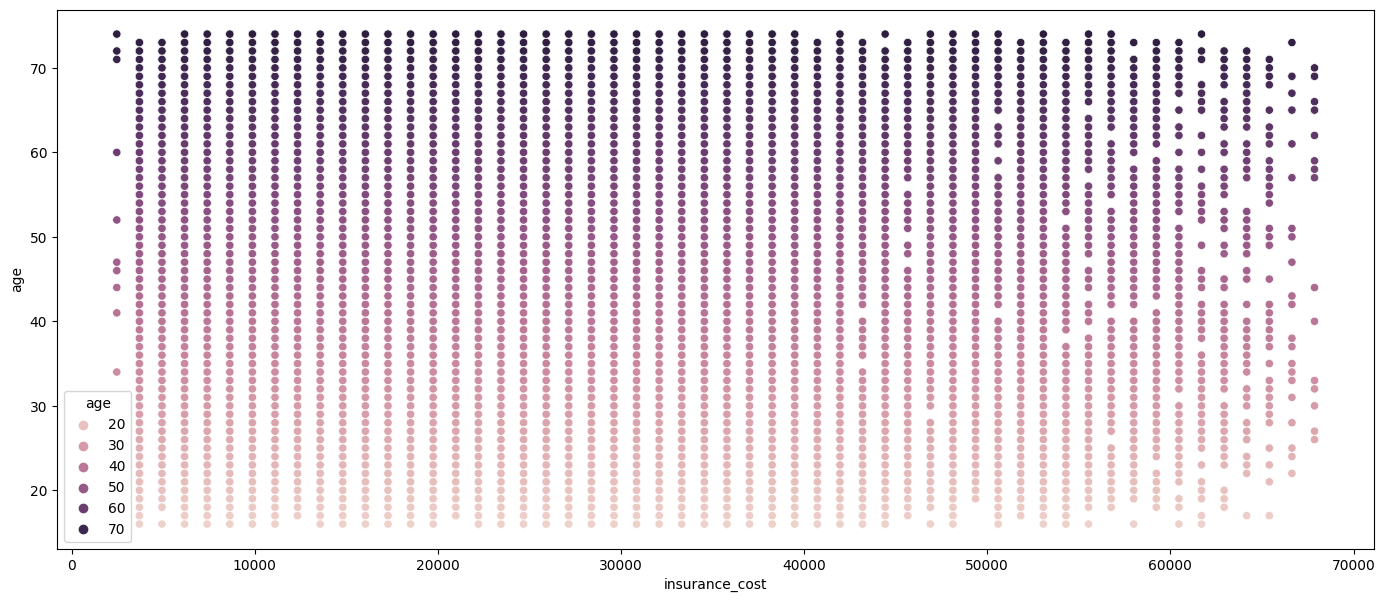

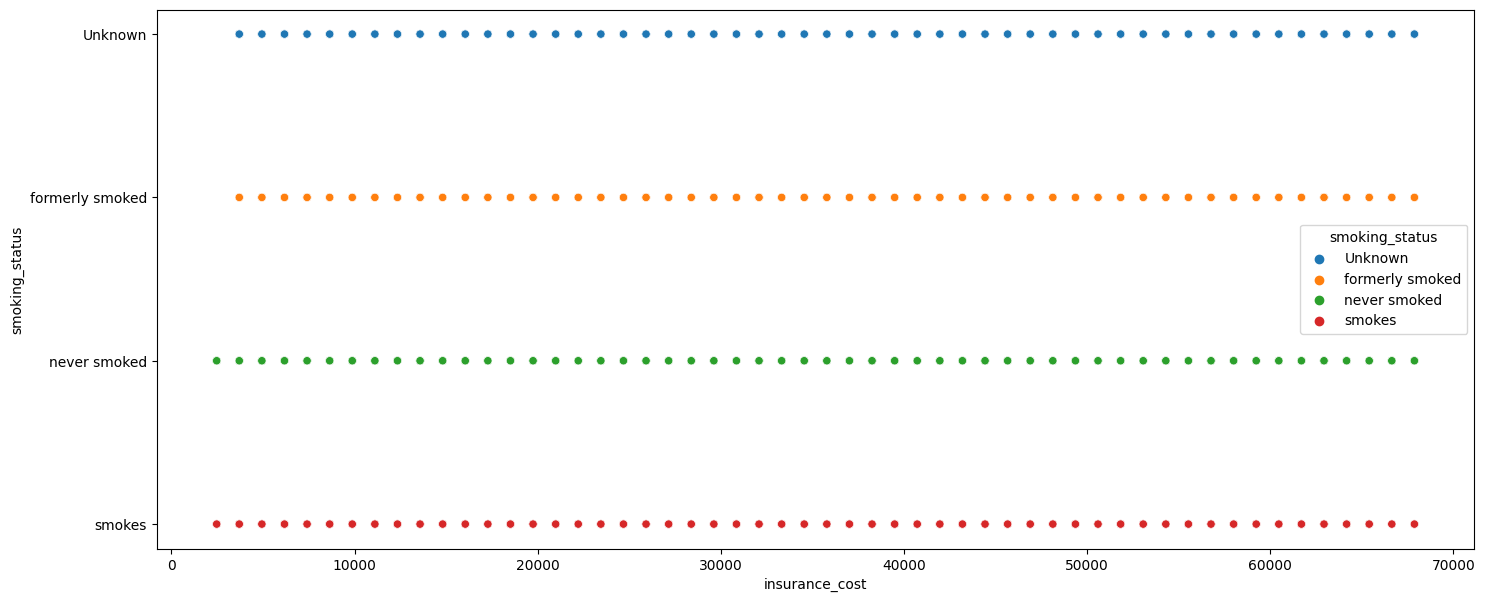

In [ ]:
# Plotting scatter plot of weight vs insurance cost
features = ['insurance_cost']

# Impact of Alcohol
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 1, i + 1)
	sns.scatterplot(data=df, x=col,
				y='Alcohol',
				hue = 'Alcohol')
plt.show()

# Impact of Cholesterol Level
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 1, i + 1)
	sns.scatterplot(data=df, x=col,
				y='cholesterol_level',
				hue = 'cholesterol_level')
plt.show()

# Impact of Fat Percentage
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 1, i + 1)
	sns.scatterplot(data=df, x=col,
				y='fat_percentage',
				hue = 'fat_percentage')
plt.show()

# Impact of Age
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 1, i + 1)
	sns.scatterplot(data=df, x=col,
				y='age',
				hue = 'age')
plt.show()

# Impact of Smoking Status
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 1, i + 1)
	sns.scatterplot(data=df, x=col,
				y='smoking_status',
				hue = 'smoking_status')
plt.show()

In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

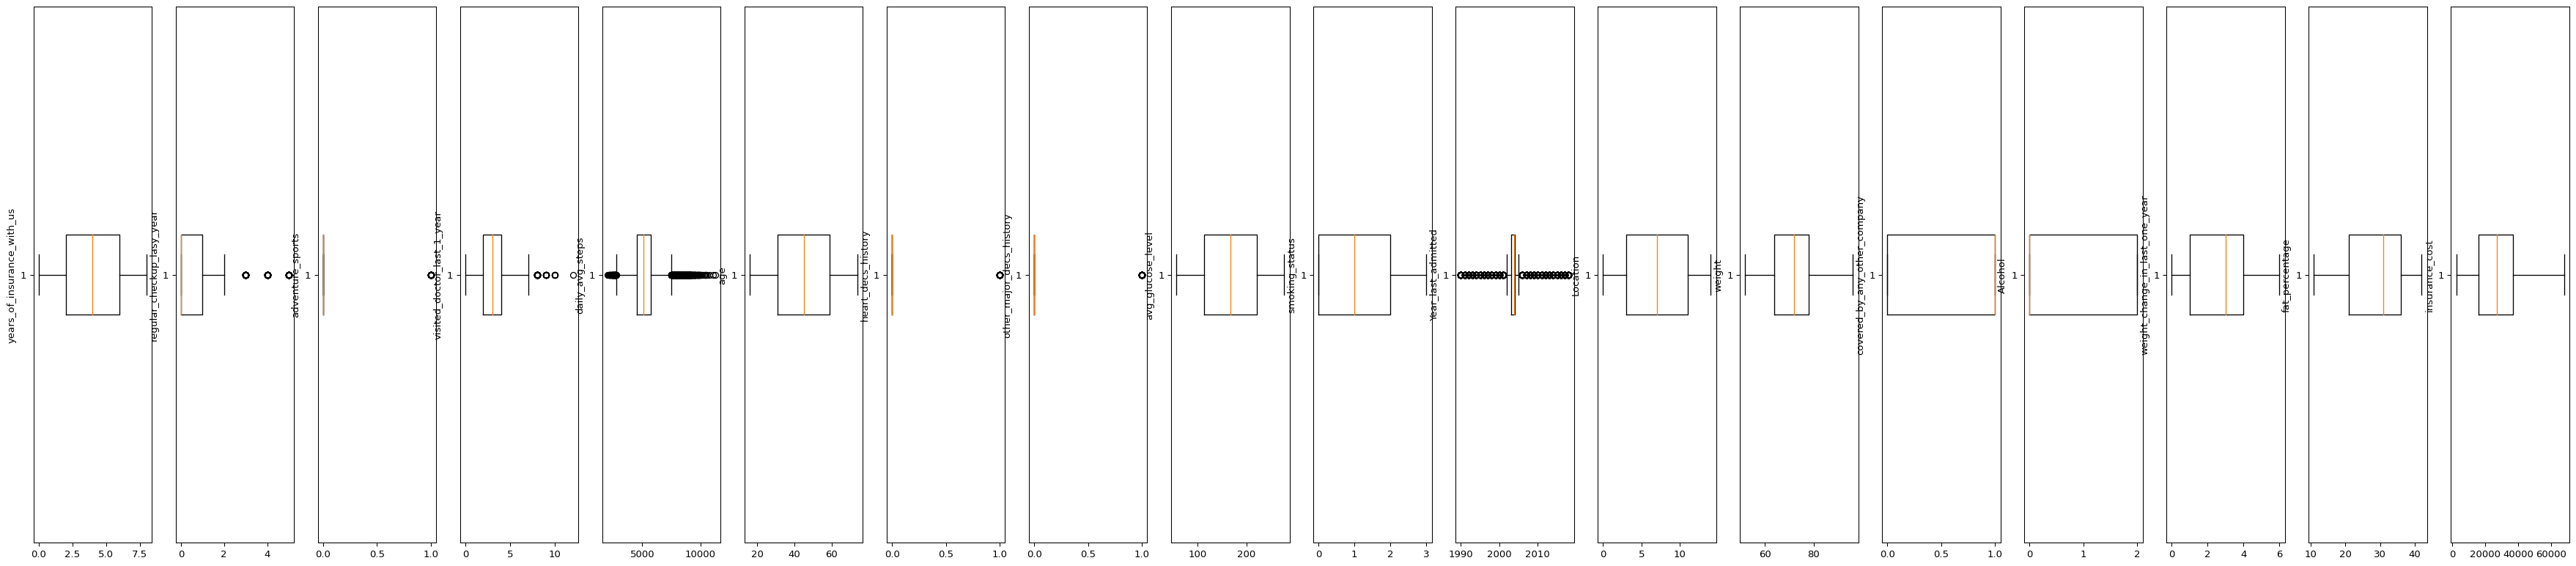

In [ ]:
# Box Plots

fig, axs = plt.subplots(dpi=95, figsize=(47,10),ncols=len(df.columns))

# Loop through each attribute and create a box plot
i=0
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

# Show the plot
plt.show()


In [ ]:
# Finding upper and lower limit for bmi
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('The lower and upper limit for bmi is :')
print(lowlim)
print(upplim)

# Drop the outliers
clean_data = df[(df['bmi'] >= lowlim) & (df['bmi'] <= upplim)]

The lower and upper limit for bmi is :
11.850000000000001
49.85


In [ ]:
# Finding upper and lower limit for average glucose level
Q1=df['avg_glucose_level'].quantile(0.25)
Q2=df['avg_glucose_level'].quantile(0.5)
Q3=df['avg_glucose_level'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('The lower and upper limit for average glucose level is :')
print(lowlim)
print(upplim)

# Drop the outliers
clean_data = df[(df['avg_glucose_level'] >= lowlim) & (df['avg_glucose_level'] <= upplim)]

The lower and upper limit for average glucose level is :
-50.5
385.5


In [ ]:
# Finding upper and lower limit for average glucose level
Q1=df['fat_percentage'].quantile(0.25)
Q2=df['fat_percentage'].quantile(0.5)
Q3=df['fat_percentage'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('The lower and upper limit for fat percentage is :')
print(lowlim)
print(upplim)

# Drop the outliers
clean_data = df[(df['fat_percentage'] >= lowlim) & (df['fat_percentage'] <= upplim)]

The lower and upper limit for fat percentage is :
-1.5
58.5


In [ ]:
# Showing the skewness of age and bmi
df['bmi'].skew()


1.0564277700656508

In [ ]:
df['age'].skew()

0.01386002805629118

In [ ]:
# Mapping all non-numeric column values to integers
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['covered_by_any_other_company']=df['covered_by_any_other_company'].map({'Y':0,'N':1})
df['smoking_status']=df['smoking_status'].map({'Unknown':1,'never smoked':0,'formerly smoked':2,'smokes':3})
df['Location']=df['Location'].map({'Chennai':0, 'Jaipur':1,'Bangalore':2,'Guwahati':3,'Delhi':4,'Mumbai':5,'Kolkata':6,'Ahmedabad':7,'Kanpur':8,'Nagpur':9,'Lucknow':10,'Pune':11,'Surat':12,'Mangalore':13,'Bhubaneswar':14})
df['Occupation']=df['Occupation'].map({'Salried':0, 'Student':1,'Business':2})
df['cholesterol_level']=df['cholesterol_level'].map({'125 to 150':0, '150 to 175':1,'175 to 200':2,'200 to 225':3,'225 to 250':4})
df['Alcohol']=df['Alcohol'].map({'Rare':0, 'Daily':1,'No':2})
df['exercise']=df['exercise'].map({'Moderate':0, 'Extreme':1,'No':2})

In [ ]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [ ]:
# Impute the missing values by mean
missing_col = ['bmi','Year_last_admitted']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [ ]:
df.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Year_last_admitted                0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

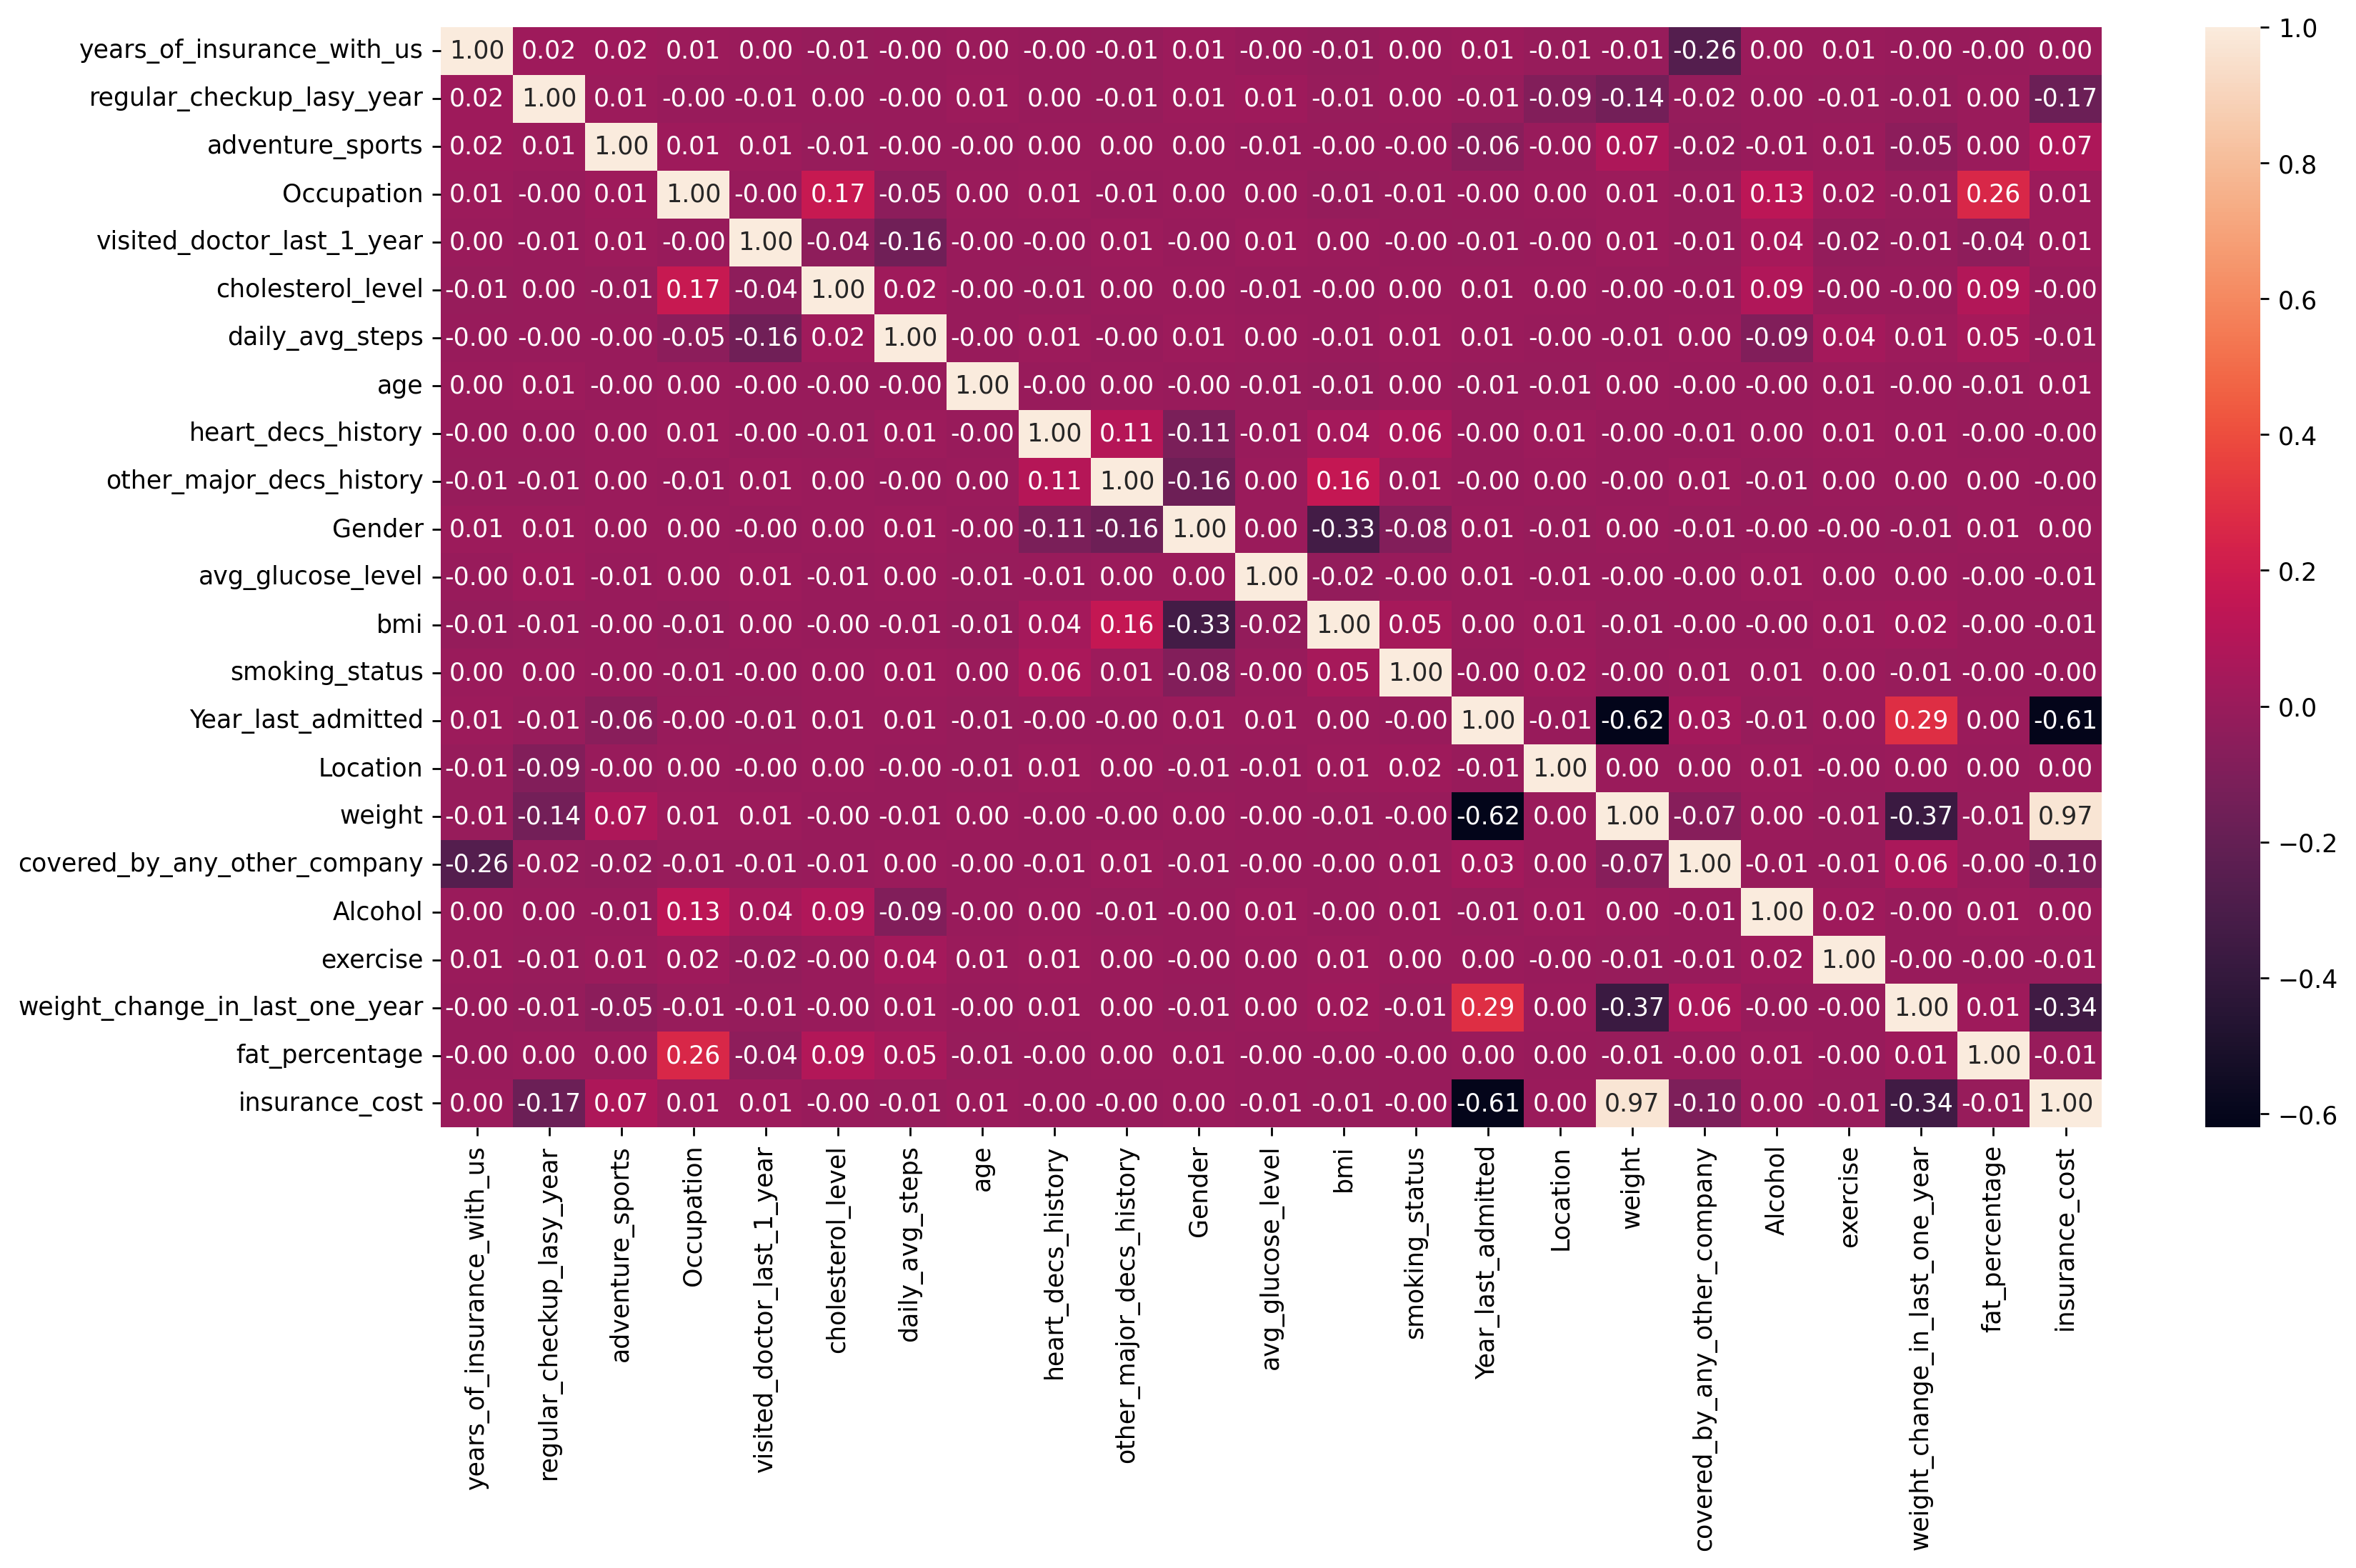

In [ ]:

#correlation
corr = df.corr()

plt.figure(dpi=250,figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()


In [ ]:
# Impact of each column on output
corr['insurance_cost'].sort_values(ascending = False)


insurance_cost                    1.000000
weight                            0.970357
adventure_sports                  0.074561
Occupation                        0.009172
visited_doctor_last_1_year        0.008890
age                               0.005195
Location                          0.004513
Alcohol                           0.004002
Gender                            0.002149
years_of_insurance_with_us        0.001404
heart_decs_history               -0.000445
cholesterol_level                -0.001442
smoking_status                   -0.001799
other_major_decs_history         -0.002268
avg_glucose_level                -0.005007
daily_avg_steps                  -0.006565
bmi                              -0.008071
fat_percentage                   -0.008486
exercise                         -0.011078
covered_by_any_other_company     -0.101624
regular_checkup_lasy_year        -0.174005
weight_change_in_last_one_year   -0.342710
Year_last_admitted               -0.607431
Name: insur

In [ ]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
years_of_insurance_with_us,0.002158
regular_checkup_lasy_year,0.004391
adventure_sports,0.001024
Occupation,0.000638
visited_doctor_last_1_year,0.001121
cholesterol_level,0.000978
daily_avg_steps,0.001213
age,0.001489
heart_decs_history,0.001208
other_major_decs_history,0.000732


In [ ]:
important_features=feats[feats['Importance']>0.001]
important_features

,Importance
years_of_insurance_with_us,0.002158
regular_checkup_lasy_year,0.004391
adventure_sports,0.001024
visited_doctor_last_1_year,0.001121
daily_avg_steps,0.001213
age,0.001489
heart_decs_history,0.001208
avg_glucose_level,0.001283
smoking_status,0.001060
Year_last_admitted,0.004484


In [ ]:
# Dropping the atributes with least significance
df.drop(df[['Occupation','cholesterol_level','Gender','bmi','exercise']],axis=1,inplace=True)

In [ ]:
# Divide the outcome from attributes
X=df.drop(['insurance_cost'],axis=1)
Y=df[['insurance_cost']]
l1=[]
l2=[]
l3=[]
cvs=0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]


In [ ]:
# Dividing the dataset for training and testing purpose
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)

In [31]:
# For linear regression
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
ypredtrain1 = lrmodel.predict(xtrain)
ypredtest1 = lrmodel.predict(xtest)
print('By Linear Regression')
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

By Linear Regression
0.9445451337166714
0.9459995217486774
0.9447435948251931


In [ ]:
# For Support Vector Regression with linear kernel
from sklearn.svm import LinearSVR
svrmodel = LinearSVR(random_state=42)
svrmodel.fit(xtrain, ytrain)
ypredtrain3 = svrmodel.predict(xtrain)
ypredtest3 = svrmodel.predict(xtest)
print('By Support Vector Regression with linear kernel')
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(svrmodel, X, Y, cv=5).mean())


By Support Vector Regression with linear kernel
0.9215966510345013
0.9236842525079245
0.939939353673213


In [ ]:
# For Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor(max_depth=10,random_state=42)
dtmodel.fit(xtrain, ytrain)
ypredtrain4 = dtmodel.predict(xtrain)
ypredtest4 = dtmodel.predict(xtest)
print('By Decision Tree Regression')
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(dtmodel, X, Y, cv=5).mean())


By Decision Tree Regression
0.9658442847698399
0.9492805054751285
0.9482330216949553


In [ ]:
# For K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor(n_neighbors=3)
knnmodel.fit(xtrain, ytrain)
ypredtrain5 = knnmodel.predict(xtrain)
ypredtest5 = knnmodel.predict(xtest)
print('By K-Nearest Neighbors Regression')
print(r2_score(ytrain, ypredtrain5))
print(r2_score(ytest, ypredtest5))
print(cross_val_score(knnmodel, X, Y, cv=5).mean())


By K-Nearest Neighbors Regression
0.8076156661691312
0.5997816484654153
0.5979381286506819


In [ ]:
# For Random Forest Regressor
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print('By Random Forest Regressor')
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

By Random Forest Regressor
0.993538755596875
0.9552216776903073
0.9541425970958846


In [ ]:
# Searching for best parameters in Random Forest Regressor
from sklearn.model_selection import GridSearchCV

estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'n_estimators': 150}


In [ ]:
# Tuning the best parameters into Random Forest Regressor
rfmodel=RandomForestRegressor(random_state=42,n_estimators=150)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print('By Random Forest Regressor --- After Hyperparameter Tuning')
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

By Random Forest Regressor --- After Hyperparameter Tuning
0.9937262107568167
0.9553483380707454
0.9546365369705075


In [ ]:
# For Gradient Boosting Regressor
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print('By Gradient Boosting')
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

By Gradient Boosting
0.9577528195388828
0.9574814636805828
0.9569556693093639


In [ ]:
# Searching for best parameters in Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV

estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'learning_rate': 0.21, 'n_estimators': 50}


In [ ]:
# Tuning the best parameters into Gradient Boosting
gbmodel=GradientBoostingRegressor(n_estimators=50,learning_rate=0.21)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print('By Gradient Boosting    ---   After Hyperparameter Tuning')
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

By Gradient Boosting    ---   After Hyperparameter Tuning
0.9578458584687181
0.9574150593346235
0.9569198957340788


In [ ]:
# For XGBoost Regressor
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print('By XGBoost Regressor')
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

By XGBoost Regressor
0.9760604467971423
0.9558977870896954
0.9544663092456226


In [ ]:
# Searching for best parameters in XGBoost Regressor
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)


{'gamma': 0, 'max_depth': 5, 'n_estimators': 15}


In [ ]:
# Tuning the best parameters into XGBoost Regressor
xgmodel=XGBRegressor(n_estimators=15,max_depth=5,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print('By XGBoost Regressor   ---  After Hyperparameter Tuning')
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

By XGBoost Regressor   ---  After Hyperparameter Tuning
0.9593097328955931
0.9579302935176296
0.9572780758533448


In [ ]:
# For Neural Network Regression
from sklearn.neural_network import MLPRegressor
nnmodel = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nnmodel.fit(xtrain, ytrain)
ypredtrain7 = nnmodel.predict(xtrain)
ypredtest7 = nnmodel.predict(xtest)
print('By Neural Network Regression')
print(r2_score(ytrain, ypredtrain7))
print(r2_score(ytest, ypredtest7))
print(cross_val_score(nnmodel, X, Y, cv=5).mean())


By Neural Network Regression
0.9504331183908512
0.9513880731822889
0.9501712195153701


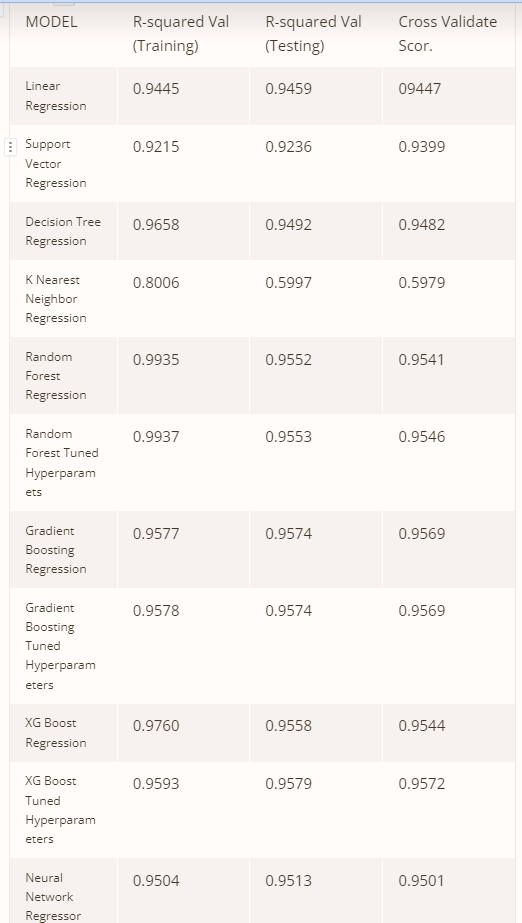